# Исследование объявлений о продаже квартир

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#откроем файл и изучим первые 10 строк датафрейма

import pandas as pd
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#изучим общую информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

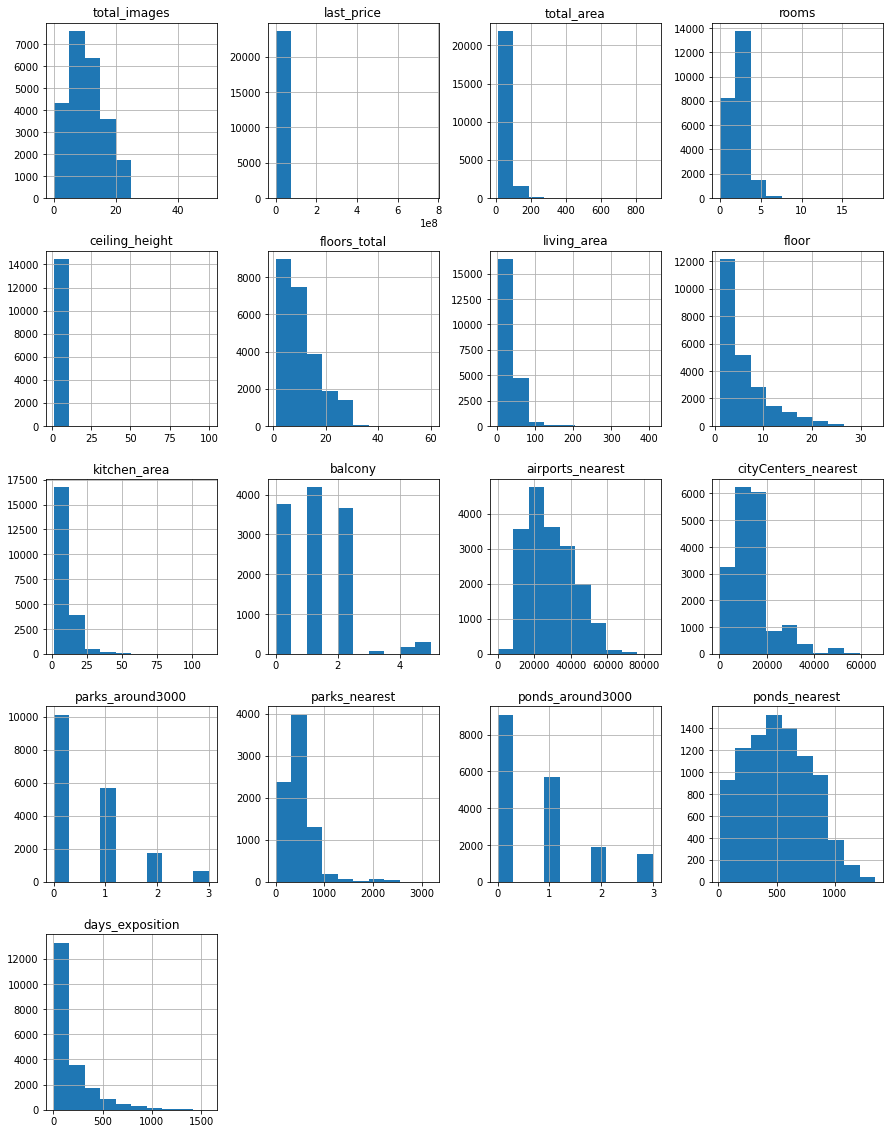

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
#итзучим количество пропусков в датафрейме

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#изучим уникальные значения столбца balcony

data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [8]:
#заменим пропуски в столбце balcony нулевыми значениями

data['balcony'] = data['balcony'].fillna(0)

In [9]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [10]:
#предположу что пропущенные значения в столбце is_apartment равны False, проверим количество заполненных значений

data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
#посмотрим на уникальные значения floors_total

data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
data = data.dropna(subset=['floors_total'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

После проверки на корректность мы видим что имеется 34 строкb где этажность дома ниже этажа квартиры, что недопустима. Принимаем решение удалить пропуски, количество небольшое, а необходимость для дальнейшей работы огромна. 


In [17]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
#заполню пропуски в столбце ceiling_height медианным значением 

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [19]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее значениен изменилось на 0,05 после заполнения пропусков медианным значением

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Итог работы с пропущенными значениями**

* Пропуски в столбце balcony скорее всего указывают на отсутсвие балкона, поэтому заменяем все на нулевые значения. При добавлении данных, пользователь мог посчитать, что при отсутсвии балкона значение может не вноситься. 

* Столбец is_apartment содержит два значение True и False, что означает является ли квартира аппартаментами либо нет, если предположить что отсутствие значения является тем что квартира не имеет статус аппартаментов, то при заполнении пропусков значениями False мы получим всего 50 аппартаментов на весь датафрейм, что вряд ли может отказаться действительностью. Поэтому оставляем данный столбец как есть.

* floors_total содержит общую этажность зданий, заполняю средним значением, считаю что 86 пропусков при заполнении средним не исказят данные для дальнейшего анализа.

* Пропуски в столбце с высотой потолков заменяю на медианное значение, средняя высота потолков в России колеблется от 2,4 до 3 метров, считаю что для выполнения задач исследования , такой подход будет приемлемым. Пропуски могли возникнуть при внесении данных, не все владельцы знают точную высоту потолков своих квартир, соответственно графа оставалась пустой.

* Пропуски в kitchen_area и living_area оставляю как есть, площадь не внесли также, возможно, по причине не знания достоверных данных. заполнять их средним будет некорректно, квартира с площадью 60 м кв может быть с площадью кухни 50 м кв 

* days_exposition важные данные, но пропуски не заменить средними, нулевыми или медианными значениями, так как речь идет о количестве дней от публикации до снятия объявления, значения сильно исказят данные.

* airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest столбцы данные которых посчитаны и внесены автоматизированно, возможно поиск данных производился в определенном диапазоне и парка, аэропорта и тд в выбранном диапазоне не оказалось, отсюда пропуск. Исходя из этого, пропуски оставляем как есть.            

In [21]:
#изучим тип данных для каждого столбца

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [22]:
#изменим тип столбца first_day_exposition на datetime 

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [23]:
#изменим тип столбца last_price на int для удобства работы с ним

data['last_price'] = data['last_price'].astype('int')

In [24]:
#изменим тип данных floors_total

data['floors_total'] = data['floors_total'].astype('int')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

**Изменение типа данных**

На данном этапе необходимость в изменении типа данных, для дальнейшей работы, видна у столбца first_day_exposition. В работе с датой и временем тип datetime подходит лучше всего. Также изменение типа данных у столбца с ценой позволит упростить работу в дальнейшем с этими данными.

Изменим тип данных в столбце floors_total для дальнейшего удобства работы с данными, количество этажей в доме в любом случае будет целым числом и формат int то, что необходимо

In [26]:
#проверим датафрейм на наличие строк дубликатов

data.duplicated().sum()

0

In [27]:
#изучим уникальные значения столбца locality_name

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
#приведем названия населенных пунктов к единому виду 

data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('посёлок', 'поселок', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('имени', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('городской', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('городского типа', '', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('станции', '', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('при железнодорожной', '', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('коттеджный', '', regex=True)
data.loc[:, 'locality_name'] = data.loc[:, 'locality_name'].replace('поселок Мурино', 'Мурино', regex=True)

In [29]:
# check
data['locality_name'].nunique()

329

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок  Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок  Лебяжье', 'поселок  Сиверский',
       'поселок Молодцово', 'поселок  Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок  Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогор

In [31]:
#посмотрим на уникальные значения высоты потолков

data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [32]:
#избавимся от аномальных значений в данных 

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10

In [33]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [34]:
data.loc[data['ceiling_height'] >= 5, ['ceiling_height']] = 0
data.loc[data['ceiling_height'] <= 2, ['ceiling_height']] = 0
data['ceiling_height'] = data['ceiling_height'].dropna()

In [35]:
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 0.  , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54,
       3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 ,
       3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36,
       3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14,
       4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32,
       2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21,
       3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.93,
       3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.

In [36]:
data = data.query('ceiling_height > 2')

In [37]:
#показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
#в выбранных параметрах о продаже квартир
#сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,583.00","23,583.00","23,583.00","20,417.00","23,583.00","21,718.00","21,360.00","23,583.00","23,583.00"
min,0.00,12.00,2.20,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,4.90,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [38]:
#избавимся от аномальной минимальной стоимости квартиры

data = data.query('last_price > 12190')
data['last_price'].min()

430000

In [39]:
#почистим значения в столбце количества комнат выше 15 

data = data.query('rooms <= 8')
data['rooms'].value_counts()

1    8002
2    7906
3    5789
4    1176
5     323
0     193
6     103
7      59
8      12
Name: rooms, dtype: int64

In [40]:
data['rooms'].max()

8

In [42]:
data.info()

data = data.query('floors_total <= 30')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  int64         
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23563 non-null  int64         
 7   living_area           21699 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          2770 non-null   object        
 10  studio                23563 non-null  bool          
 11  open_plan             23563 non-null  bool          
 12  kitchen_area          21341 non-null  float64       
 13  balcony         

In [43]:
data['floors_total'].max()

29

### Посчитайте и добавьте в таблицу новые столбцы

In [49]:
#посчитаем и добавим в тублицу столбец с ценой за один квадратный метр

data['one_m_price'] = data['last_price'] / data['total_area']
data['one_m_price'] = data['one_m_price'].round(1)

In [50]:
#посчитаем и добавим в таблицу день публикации объявления 

data['day_of_publication'] = data['first_day_exposition'].dt.weekday

In [51]:
#посчитаем и добавим в таблицу месяц публикации объявления 

data['month_of_publication'] = data['first_day_exposition'].dt.month

In [52]:
#посчитаем и добавим в таблицу год публикации объявления

data['year_of_publication'] = data['first_day_exposition'].dt.year

In [53]:
#посчитаем и добавим в таблицу тип этажа квартиры
#создадим для этого функцию, которая на основании данных столбцов floor и floors_total сформирует новый столбец

def type_floor(floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'
data['type_floor'] = data.apply(type_floor, axis=1) 

In [54]:
data['type_floor'] = data['type_floor'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23532 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23532 non-null  int64         
 1   last_price            23532 non-null  int64         
 2   total_area            23532 non-null  float64       
 3   first_day_exposition  23532 non-null  datetime64[ns]
 4   rooms                 23532 non-null  int64         
 5   ceiling_height        23532 non-null  float64       
 6   floors_total          23532 non-null  int64         
 7   living_area           21669 non-null  float64       
 8   floor                 23532 non-null  int64         
 9   is_apartment          2766 non-null   object        
 10  studio                23532 non-null  bool          
 11  open_plan             23532 non-null  bool          
 12  kitchen_area          21313 non-null  float64       
 13  balcony         

In [55]:
#посчитаем и добавим в таблицу столбец с расстоянием в км до центра города 

data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)

### Проведите исследовательский анализ данных

#### изучим следующие параметры:

In [56]:
data[['total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'last_price', 'rooms', 'floors_total']].describe()

,total_area,living_area,kitchen_area,ceiling_height,last_price,rooms,floors_total
count,23532.000000,21669.000000,21313.000000,23532.000000,2.353200e+04,23532.000000,23532.000000
mean,60.086223,34.308651,10.536238,2.696137,6.488315e+06,2.064083,10.644612
std,34.378233,21.304278,5.801439,0.214836,1.046028e+07,1.043269,6.531008
min,12.000000,2.000000,1.300000,2.200000,4.300000e+05,0.000000,1.000000
25%,40.000000,18.600000,7.000000,2.600000,3.400000e+06,1.000000,5.000000
50%,52.000000,30.000000,9.100000,2.650000,4.630000e+06,2.000000,9.000000
75%,69.600000,42.300000,12.000000,2.700000,6.750000e+06,3.000000,16.000000
max,631.200000,347.500000,107.000000,4.900000,7.630000e+08,8.000000,29.000000


In [57]:
data[['parks_nearest', 'airports_nearest', 'cityCenters_nearest']].describe()

,parks_nearest,airports_nearest,cityCenters_nearest
count,8012.000000,18011.000000,18034.000000
mean,490.706316,28811.872189,14184.363314
std,341.779365,12633.666253,8615.113873
min,1.000000,0.000000,181.000000
25%,288.000000,18557.000000,9234.000000
50%,455.000000,26766.000000,13091.000000
75%,612.000000,37284.000000,16275.000000
max,3190.000000,84869.000000,65968.000000


In [58]:
data['rooms'].value_counts()

1    7994
2    7890
3    5784
4    1176
5     323
0     191
6     103
7      59
8      12
Name: rooms, dtype: int64

In [59]:
data['type_floor'].value_counts()

другой       17306
последний     3319
первый        2907
Name: type_floor, dtype: int64

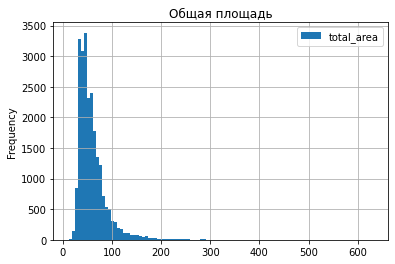

In [60]:
#построим гистограммы для каждого параметра

data['total_area'].plot(
    title='Общая площадь',
    kind='hist',
    grid=True,
    bins=100,
    legend=True
);

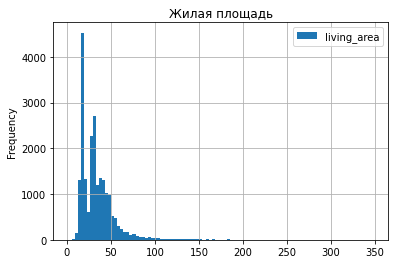

In [61]:
data['living_area'].plot(
    title='Жилая площадь',
    kind='hist',
    grid=True,
    bins=100,
    legend=True
);

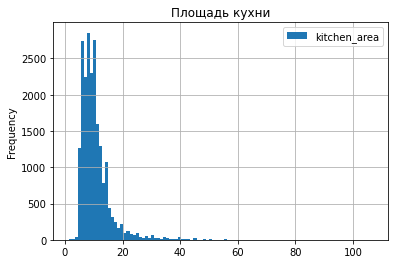

In [62]:
data['kitchen_area'].plot(
    title='Площадь кухни',
    kind='hist',
    grid=True,
    bins=100,
    legend=True,
);

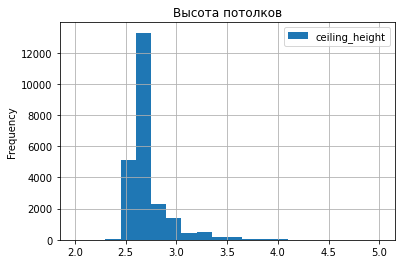

In [63]:
data['ceiling_height'].plot(
    title='Высота потолков',
    kind='hist',
    grid=True,
    bins=20,
    legend=True,
    range=(2,5) 
);

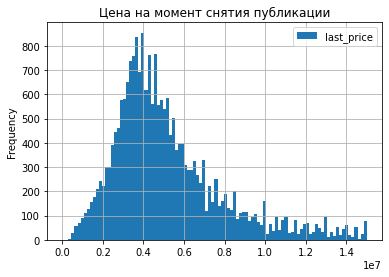

In [64]:
data['last_price'].plot(
    title='Цена на момент снятия публикации',
    kind='hist',
    grid=True,
    bins=100,
    legend=True,
    range=(0, 15000000)
);

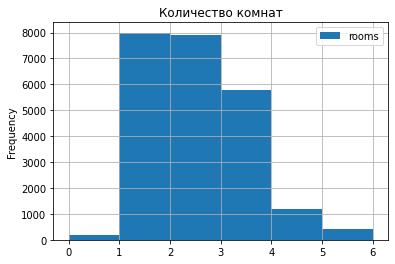

In [65]:
data['rooms'].plot(
    title='Количество комнат',
    kind='hist',
    grid=True,
    bins=6,
    legend=True,
    range=(0, 6)
);

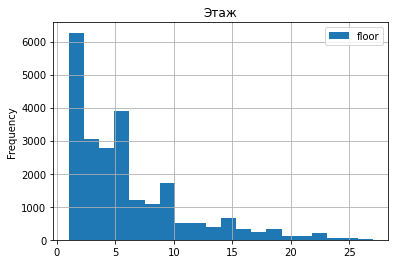

In [66]:
data['floor'].plot(
    title='Этаж',
    kind='hist',
    grid=True,
    bins=20,
    legend=True
);

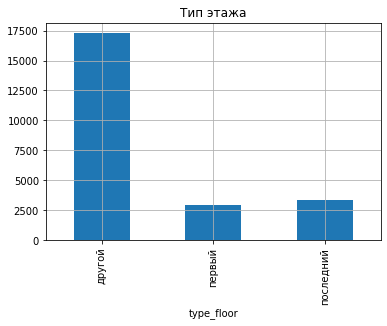

In [68]:
data.pivot_table(
        index='type_floor', \
        values='last_price',
        aggfunc = 'count' 
).plot(
    kind='bar',
    title='Тип этажа',
    legend=False,
    grid=True
);

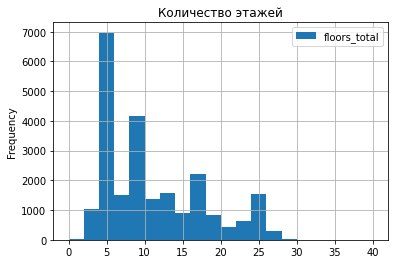

In [69]:
data['floors_total'].plot(
    title='Количество этажей',
    kind='hist',
    grid=True,
    bins=20,
    legend=True,
    range=(0, 40)
);

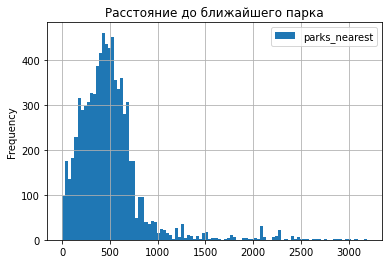

In [70]:
data['parks_nearest'].plot(
    title='Расстояние до ближайшего парка',
    kind='hist',
    grid=True,
    bins=100,
    legend=True
);

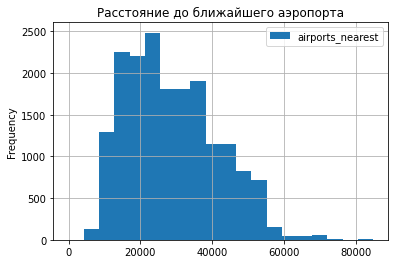

In [71]:
data['airports_nearest'].plot(
    title='Расстояние до ближайшего аэропорта',
    kind='hist',
    grid=True,
    bins=20,
    legend=True
);

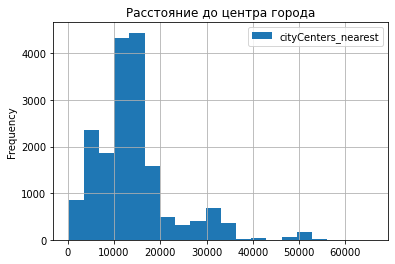

In [72]:
data['cityCenters_nearest'].plot(
    title='Расстояние до центра города',
    kind='hist',
    grid=True,
    bins=20,
    legend=True
);

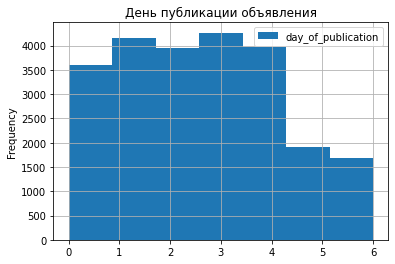

In [73]:
data['day_of_publication'].plot(
    title='День публикации объявления',
    kind='hist',
    grid=True,
    bins=7,
    legend=True
);

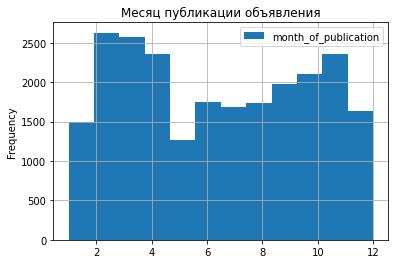

In [74]:
data['month_of_publication'].plot(
    title='Месяц публикации объявления',
    kind='hist',
    grid=True,
    bins=12,
    legend=True
);

**Предварительный анализ показал что:**

* Общая площадь недвижимости от 12 кв.м. до 900 кв.м. , среднее значение выглядит реальным. 
* Средняя высота потолков 2.65.
* Цена от 12 тыс. до 763 млн. р. Для каждого покупателя найдется вариант по его ценовым запросам.
* Количество комнат от 0 до 19 , больше всего объявлений о продаже двухкомнатных квартир.
* Количество этажей в домах где продаются квартиры от 1 до 60.
* Больше всего объявлений о продаже однокомнатных и двухкомнатных квартир.
* Наименьшее количество объявлений о продаже квартиры на первом этаже.
* Объявления публиковались чаще в будние дни, с заметным спадом публикаций в выходные. 
* Февраль, Март и Апрель лидеры по количеству публикаций объявлений, самое малое количество публикаций было в Мае.
* Больше всего объвлений о продаже квартир в пятиэтажных домах. 

#### Задание: изучить как быстро продавались квартиры.

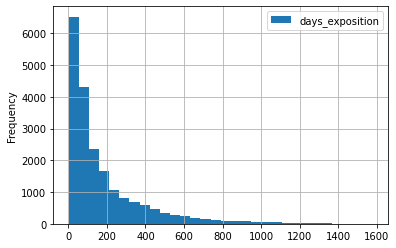

In [75]:
#построим гистограмму

data['days_exposition'].plot(
    kind='hist',
    grid=True,
    bins=30,
    legend=True
);

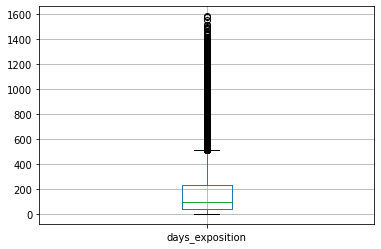

In [76]:
#построим диаграмму размаха

data.boxplot(column='days_exposition');

In [77]:
data['days_exposition'].describe()

count    20379.000000
mean       180.785515
std        219.557778
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи 180 дней, медианное 95 дней. Продажа квартиры за 95 дней после публикации очень хороший показатель. 
Большая часть квартир продается в первые 100 дней. 
Время продажи 1580 дней слишком долгое, можно предположить что объявление не было снято после продажи, отсюда такой длительный показатель.
По результатам диаграммы размаха можем отсечь данные продаж свыше 500 дней. 

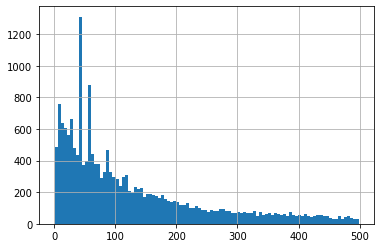

In [78]:
data.query('days_exposition<500')['days_exposition'].hist(bins=100);

Большая часть квартир продается в первые 50 дней, это быстрые продажи. Пиковые значения могли возникнуть из за снятия с публикации объявления, возможно автоматически после 45 дней показа. 

#### Задание: выяснить какие факторы больше всего влияют на общую (полную) стоимость объекта.

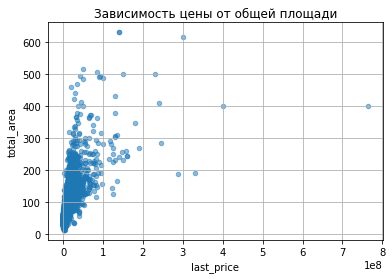

In [79]:
#построим графики чтобы изучить какие факторы влияют на стоимость объекта

data.plot(
    title='Зависимость цены от общей площади',
    x='last_price',
    y='total_area',
    kind='scatter',
    grid=True,
    legend=True,
    alpha=0.5
);

In [80]:
#посчитаем коэффициент корреляции

data['last_price'].corr(data['total_area'])

0.6415569820298743

Размер общей площади влияет на ценовую политику квартир. С увеличением общей площади виден равномерный рост цены.

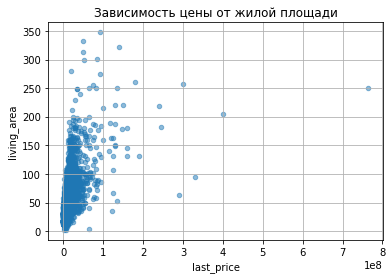

In [81]:
data.plot(
    title='Зависимость цены от жилой площади',
    x='last_price',
    y='living_area',
    kind='scatter',
    grid=True,
    legend=True,
    alpha=0.5
);

In [82]:
data['last_price'].corr(data['living_area'])

0.5551279056689146

Жилая площадь также оказывает влияние на цену. При увеличении жилой площади цена увеличивается, но уже менее прогрессивно 

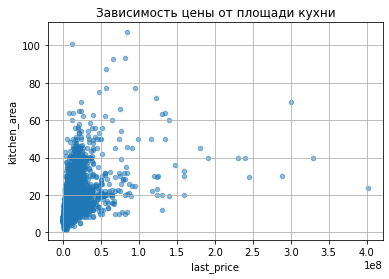

In [83]:
data.plot(
    title='Зависимость цены от площади кухни',
    x='last_price',
    y='kitchen_area',
    kind='scatter',
    grid=True,
    legend=True,
    alpha=0.5
);

In [84]:
data['last_price'].corr(data['kitchen_area'])

0.5065100853313933

Площадь кухни также с увеличением ведет за собой равномерный рост цены

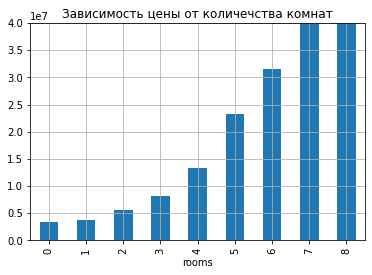

In [85]:
data.pivot_table(
    index='rooms',
    values='last_price'
).plot(
    title='Зависимость цены от количечства комнат',
    kind='bar',
    grid=True,
    legend=False,
    ylim=(0, 40000000)
);

In [86]:
data['last_price'].corr(data['rooms'])

0.35527075575462036

Логично, с увеличением количества комнат видим увеличение цены. Квартиры с количеством комнат менее 3-х заметно дешевле чем квартиры с большим количеством.

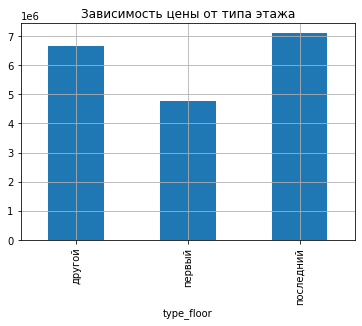

In [87]:
data.pivot_table(
    index='type_floor',
    values='last_price'
).plot(
    title='Зависимость цены от типа этажа',
    kind='bar',
    grid=True,
    legend=False
);

Квартиры на первом этаже продаются дешевле в отличие от квартир этажами выше. 

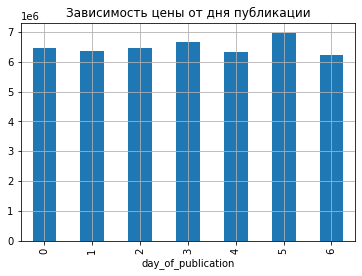

In [88]:
data.pivot_table(
    index='day_of_publication',
    values='last_price'
).plot(
    title='Зависимость цены от дня публикации',
    kind='bar',
    grid=True,
    legend=False
);

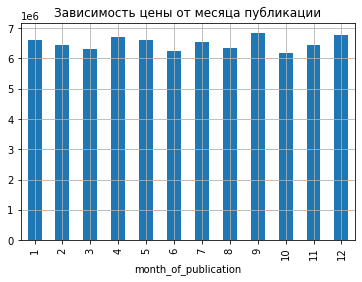

In [89]:
data.pivot_table(
    index='month_of_publication',
    values='last_price'
).plot(
    title='Зависимость цены от месяца публикации',
    kind='bar',
    grid=True,
    legend=False
);

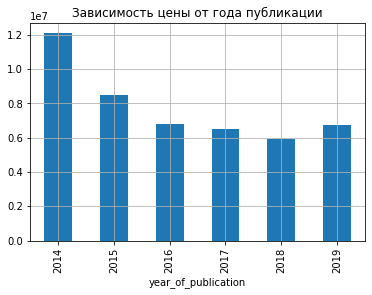

In [90]:
data.pivot_table(
    index='year_of_publication',
    values='last_price'
).plot(
    title='Зависимость цены от года публикации',
    kind='bar',
    grid=True,
    legend=False
);

После первой половины 2017 года, видим небольшое увеличение цен. В целом, даты публикации объявлений оказывают незначительное влияние на ценовую политику. 

#### Задание: посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [91]:
group = data.pivot_table(index='locality_name', values='one_m_price', aggfunc=['count', 'mean'])
group.columns = ['count', 'mean']
group = group.sort_values(by='count', ascending=False).head(10)
group['mean'] = group['mean'].round(1)
group.sort_values(by='mean', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15584,114768.4
Пушкин,369,103125.8
деревня Кудрово,299,92473.5
поселок Парголово,327,90175.9
Мурино,586,86041.1
поселок Шушары,439,78551.3
Колпино,338,75424.6
Гатчина,307,68746.1
Всеволожск,397,68719.3


In [92]:
group.sort_values(by='mean', ascending=False).head(1)

,count,mean
locality_name,,
Санкт-Петербург,15584,114768.4


In [93]:
group.sort_values(by='mean', ascending=False).tail(1)

,count,mean
locality_name,,
Выборг,235,58238.1


Санкт-Петербург имеет самую высокую среднюю стоимость квадратного метра.
У Выборга самая низкая средняя стоимость за квадратный метр.

**Задание:** Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра.

In [94]:
#Выделим все квартиры в Санкт-Петербурге

data_spb = data.query('locality_name == "Санкт-Петербург"').sort_values(by='cityCenters_nearest_km', ascending=True)
data_spb = data_spb.fillna(100000)
data_spb = data_spb.query(
    'cityCenters_nearest_km != 100000').pivot_table(
    index='cityCenters_nearest_km', \
    values='one_m_price', \
    aggfunc='mean'
)
data_spb

,one_m_price
cityCenters_nearest_km,
0.0,245833.533333
1.0,177365.946842
2.0,157981.901618
3.0,121299.024566
4.0,133472.947445
5.0,140290.381628
6.0,150041.352760
7.0,155997.406938
8.0,124340.857458


<AxesSubplot:xlabel='cityCenters_nearest_km'>

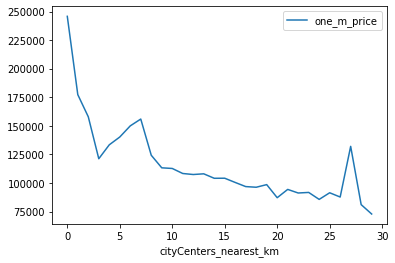

In [95]:
data_spb.plot()

Судя по графику самые высокие цены в центре Санкт-Петербурга. Цены идут на спад уходя за радиус 3,5 км от центра. 

### Общий вывод

* Было проведено исследование чтобы найти особенности и зависимости, которые существуют на рынке недвижимости города Санкт-Петербурга и соседних населенных пунктов. Входные данные от сервиса Яндекс Недвижимости - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 

* В ходе исследования были изучены входящие данные, обработаны пропущенные значения, там где это возможно. Были изменены типы данных на необходимые типы для дальнейшей работы. Проведена работа по устранению неявных дубликатов в названиях населенных пунктов. Было посчитано и добалено в таблицу: цена за квадратный метр; день, месяц и год публикации объявления; тип этажа квартиры; расстояние в километрах до центра города. 

* Изучили параметры: общая площадь, жилая площадь, площадь кухни, высоту потолков, количество комнат, этажей. В результате ислледования выявили что больше всего объявлений о продаже однокомнатных и двухкомнатных квартир, квартиры в пятиэтажных домах лидируют по количеству объявлений о продаже, первый этаж существенно дешевле и имеет меньшее количество объявлений в отличии от квартир на других этажах. 

* Изучили как быстро продавались квартиры: большая часть квартир продается за первые 100 дней, но нормальная продажа считается от 1 до 500 дней. Также часть объявлений автоматически снималось с публикации по истечению установленного срока, об этом говорят выпадающие значения на графике. 

* Выяснили что параметры количества комнат и тип этажа существенно влияют на ценообразование, с увеличением комнат значительно растет цена, квартиры выше первого этажа также существенно дороже чем квартиры на первом этаже. Такие параметры как площадь общая, жилая, кухонная также влияют на рост цены, с увеличением площадей плавно растет цена. Незначительное влияние на цену имеет день, месяц, год публикации объявления. 

* Провели исследование и выяснили что из десяти самый больших по количеству объявлений населенных пунктов Санкт-Петербург имеет самую высокую среднюю стоимость квадратного метра. Выборг же наоборот самую низкую среднюю стоимость за квадратный метр.

* Исходя из резкого изменения цен на графике в зависимости удаления от центра, пришли к выводу что центр города Санкт-Петербург выходит в радиус 3,5 км. Квартиры в центре Санкт-Петербурга на порядок дороже, чем в других населенных пунктах по мере отдаления от него. 